In [1]:
!pip install pykalman
!pip install filterpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.6/251.6 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110459 sha256=cc3b643a0ef4898bdedc10d566a6753d817ec4aced3a38b6e617b0ced9a8edef
  Stored in directory: /root/.cache/pip/wheels/0f/0c/ea/218f266af4ad626897562199fbbcba521b8497303200186102
Successfully built filterpy


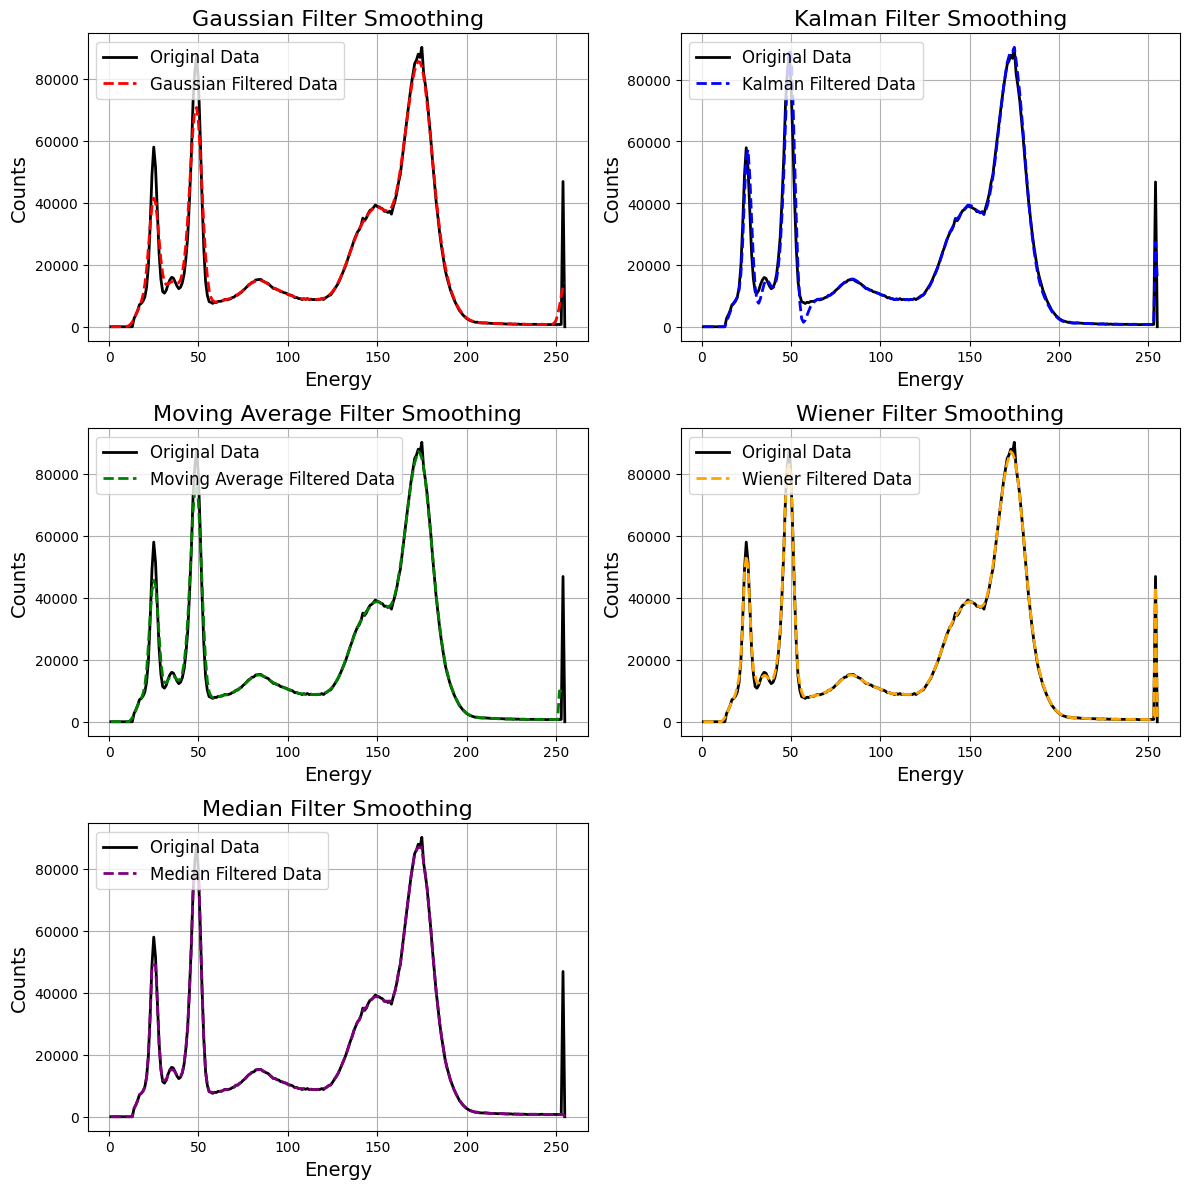

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from filterpy.kalman import KalmanFilter
from scipy.signal import wiener, medfilt

# 1. Reading data from the file
data = pd.read_csv('15.5.csv')
energy = data.iloc[:, 0].values
counts = data.iloc[:, 1].values

# Adding noise to the data
np.random.seed(42)
noise = np.random.normal(0, 10, size=counts.shape)
noisy_counts = counts + noise

# **Gaussian Filter**
sigma = 2  # You can change the value for sigma
smoothed_counts_gaussian = gaussian_filter1d(noisy_counts, sigma=sigma)

# **Kalman Filter**
kf = KalmanFilter(dim_x=2, dim_z=1)
kf.x = np.array([noisy_counts[0], 0])  # Initial state
kf.P = np.eye(2) * 1000  # Initial covariance matrix
kf.F = np.array([[1, 1], [0, 1]])  # State transition matrix
kf.H = np.array([[1, 0]])  # Observation matrix
kf.R = 10  # Observation noise variance
kf.Q = np.eye(2)  # Process noise variance

smoothed_counts_kalman = np.zeros_like(noisy_counts)
for i in range(len(noisy_counts)):
    kf.predict()
    kf.update(noisy_counts[i])
    smoothed_counts_kalman[i] = kf.x[0]

# **Moving Average Filter**
window_size = 5  # You can change the window size
smoothed_counts_moving_avg = np.convolve(noisy_counts, np.ones(window_size)/window_size, mode='same')

# **Wiener Filter**
smoothed_counts_wiener = wiener(noisy_counts, mysize=5)

# **Median Filter**
kernel_size = 5  # You can change the kernel size
smoothed_counts_median = medfilt(noisy_counts, kernel_size=kernel_size)


# **Displaying Results**
plt.figure(figsize=(12, 12))

# Gaussian Filter
plt.subplot(3, 2, 1)
plt.plot(energy, counts, label='Original Data', color='black', linewidth=2)
plt.plot(energy, smoothed_counts_gaussian, label='Gaussian Filtered Data', linestyle='--', color='red', linewidth=2)
plt.xlabel('Energy', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.legend(fontsize=12)
plt.title('Gaussian Filter Smoothing', fontsize=16)
plt.grid(True)

# Kalman Filter
plt.subplot(3, 2, 2)
plt.plot(energy, counts, label='Original Data', color='black', linewidth=2)
plt.plot(energy, smoothed_counts_kalman, label='Kalman Filtered Data', linestyle='--', color='blue', linewidth=2)
plt.xlabel('Energy', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.legend(fontsize=12)
plt.title('Kalman Filter Smoothing', fontsize=16)
plt.grid(True)

# Moving Average Filter
plt.subplot(3, 2, 3)
plt.plot(energy, counts, label='Original Data', color='black', linewidth=2)
plt.plot(energy, smoothed_counts_moving_avg, label='Moving Average Filtered Data', linestyle='--', color='green', linewidth=2)
plt.xlabel('Energy', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.legend(fontsize=12)
plt.title('Moving Average Filter Smoothing', fontsize=16)
plt.grid(True)

# Wiener Filter
plt.subplot(3, 2, 4)
plt.plot(energy, counts, label='Original Data', color='black', linewidth=2)
plt.plot(energy, smoothed_counts_wiener, label='Wiener Filtered Data', linestyle='--', color='orange', linewidth=2)
plt.xlabel('Energy', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.legend(fontsize=12)
plt.title('Wiener Filter Smoothing', fontsize=16)
plt.grid(True)

# Median Filter
plt.subplot(3, 2, 5)
plt.plot(energy, counts, label='Original Data', color='black', linewidth=2)
plt.plot(energy, smoothed_counts_median, label='Median Filtered Data', linestyle='--', color='purple', linewidth=2)
plt.xlabel('Energy', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.legend(fontsize=12)
plt.title('Median Filter Smoothing', fontsize=16)
plt.grid(True)

plt.tight_layout()
plt.show()
